**Introduction**

In this task, I worked with the World Bank Total Population dataset to understand and visualize population trends. I used Google Colab along with Python libraries such as pandas for data loading and cleaning, zipfile for extracting the CSV from the ZIP file, and matplotlib for creating visual charts. These tools helped me read the dataset, process the latest available population values, and represent them visually through graphs.

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import io

# ---------------------------------------------------
# 1. Upload ZIP file (World Bank dataset or any ZIP)
# ---------------------------------------------------
print("Please upload your ZIP file...")
uploaded = files.upload()

# Get the uploaded filename
zip_filename = list(uploaded.keys())[0]

# ---------------------------------------------------
# 2. Extract CSV from ZIP
# ---------------------------------------------------
with zipfile.ZipFile(zip_filename, 'r') as z:
    csv_files_in_zip = [f for f in z.namelist() if f.endswith('.csv')]

    # Try to find the main data file (usually doesn't contain 'Metadata')
    data_csv_file = None
    for f in csv_files_in_zip:
        if 'Metadata' not in f:
            data_csv_file = f
            break

    if data_csv_file:
        df = pd.read_csv(io.BytesIO(z.read(data_csv_file)), skiprows=4)
        print("CSV loaded successfully!")
        print(df.head())
    else:
        raise ValueError("Could not find a suitable data CSV file (non-metadata) in the zip archive.")

Please upload your ZIP file...


Saving API_SP.POP.TOTL_DS2_en_csv_v2_2461.zip to API_SP.POP.TOTL_DS2_en_csv_v2_2461 (1).zip
CSV loaded successfully!
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    54

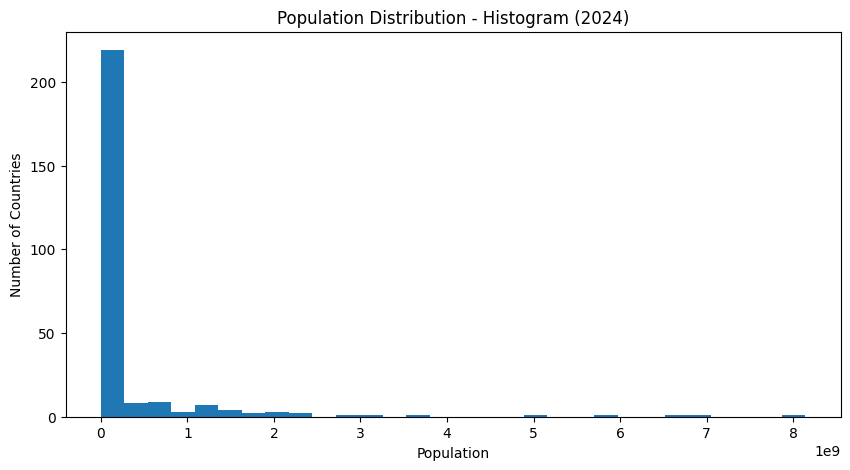

In [3]:
latest_year = df.columns[-2]  # pick last numeric year

population = df[latest_year].dropna()

plt.figure(figsize=(10,5))
plt.hist(population, bins=30)
plt.title(f"Population Distribution - Histogram ({latest_year})")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.show()


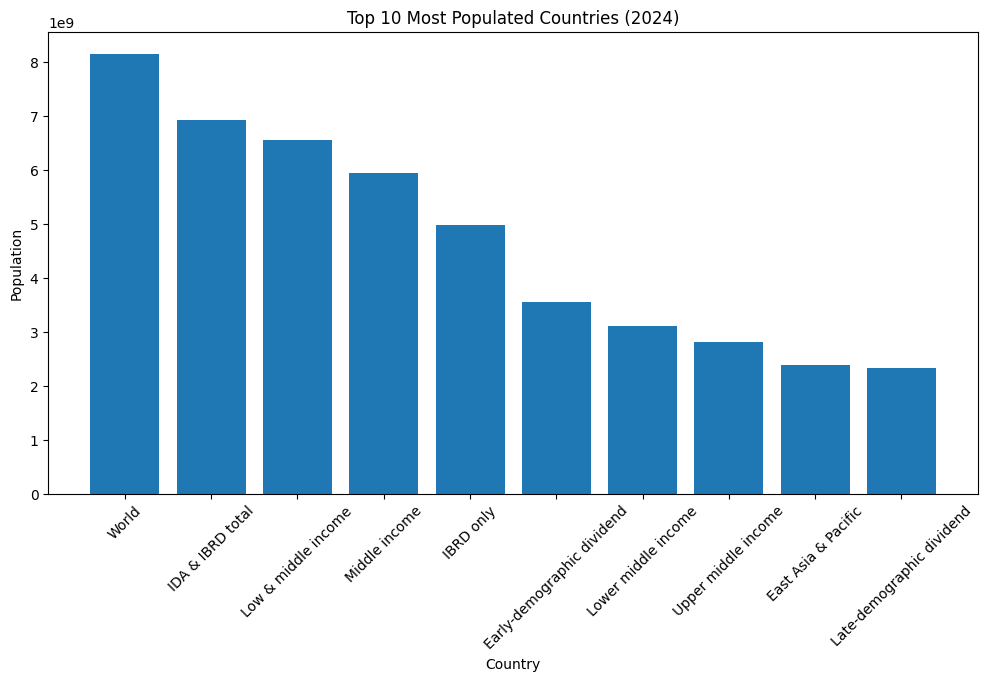

In [4]:
top10 = df[['Country Name', latest_year]].dropna().sort_values(latest_year, ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Country Name'], top10[latest_year])
plt.title(f"Top 10 Most Populated Countries ({latest_year})")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()


**Summary**

Using the processed dataset, I created a histogram to show the distribution of population across different countries and a bar chart to highlight the top 10 most populated countries.

The histogram clearly showed how population values are distributed globally, highlighting that most countries have much smaller populations, while only a few have very large populations.

The bar chart helped identify the top 10 most populated countries, giving a clearer comparison between them.